# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [580]:
import pandas as pd 
import numpy as np

import random

import seaborn as sns
import matplotlib.pyplot as plt

In [581]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather_data.csv")

In [582]:
# TODO: Merge these two dataframes together

df = pd.merge(
    left=weather,
    right=coffee,
    left_on=['subdivision', 'year'],
    right_on=['subdivision', 'year'],
    how='left'
    )

### Data Inspection

In [583]:
# TODO: View the first 5 rows of your data

df.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0


In [584]:
# TODO: Check for null values 

df[df.isna().any(axis=1)]

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
12,2018,3.567568,21.325718,28.659459,16.174324,98.290541,47.047297,8.205405,0.90109,Minas Gerais,Brazil,Arabica,28.3,NaN,NaN,NaN,NaN,NaN,NaN


In [585]:
# TODO: Drop rows that contain null values

df = df.dropna()

I decided to drop the **subdivision**, **country**, and **type** columns because they contain the same value across all rows and do not provide useful information for EDA.

In [586]:
df = df.drop(
    columns={
        'subdivision',
        'country',
        'type'
    }
)

In [587]:
df.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0


### Correlation Analysis

I decided to create a correlation matrix to analyze relationships between weather features and coffee harvest metrics.

To achieve this, I first generated lists of column names representing weather variables and coffee production features, then computed and visualized their pairwise correlations.

In [590]:
display(list(weather.columns))
display(list(coffee.columns))

['year',
 'rain_max',
 'temp_avg',
 'temp_max',
 'temp_min',
 'hum_max',
 'hum_min',
 'wind_max',
 'wind_avg',
 'subdivision']

['country',
 'subdivision',
 'type',
 '60kgs_bag',
 'year',
 'nonbearing_trees',
 'bearing_trees',
 'nonbear_hectares',
 'bearing_hectares',
 'bearing_trees_per_hectare',
 'nonbearing_trees_per_hectare']

In [591]:
weather_features = ['rain_max', 'temp_avg', 'temp_max', 'temp_min', 'hum_max', 'hum_min', 'wind_max', 'wind_avg']
coffee_features = ['60kgs_bag', 'nonbearing_trees', 'bearing_trees', 'nonbear_hectares', 'bearing_hectares', 
                   'bearing_trees_per_hectare', 'nonbearing_trees_per_hectare']

In [592]:
correlation_matrix = df[weather_features + coffee_features].corr(method='pearson')
weather_vs_coffee_corr = correlation_matrix.loc[weather_features, coffee_features]
display(weather_vs_coffee_corr)

,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
rain_max,-0.395811,-0.036131,-0.332832,-0.025034,0.182655,-0.253524,0.016599
temp_avg,-0.124772,-0.372990,-0.426886,-0.330208,0.337543,-0.432076,-0.417016
temp_max,0.666384,0.642507,0.437405,0.630370,-0.721095,0.671499,-0.073418
temp_min,-0.465089,-0.558257,-0.694924,-0.518802,0.586562,-0.715402,-0.301451
hum_max,0.267553,0.595585,0.138085,0.539221,-0.544574,0.424707,0.403109
hum_min,-0.540171,-0.310333,-0.593017,-0.299824,0.431416,-0.551204,0.010022
wind_max,-0.741652,-0.831931,-0.535009,-0.823450,0.869391,-0.828279,0.159655
wind_avg,-0.707327,-0.903117,-0.598742,-0.873002,0.925403,-0.893987,-0.064053


The simplest way to visualize feature correlations is with a heatmap annotated with Pearson’s *r* values, as shown below.

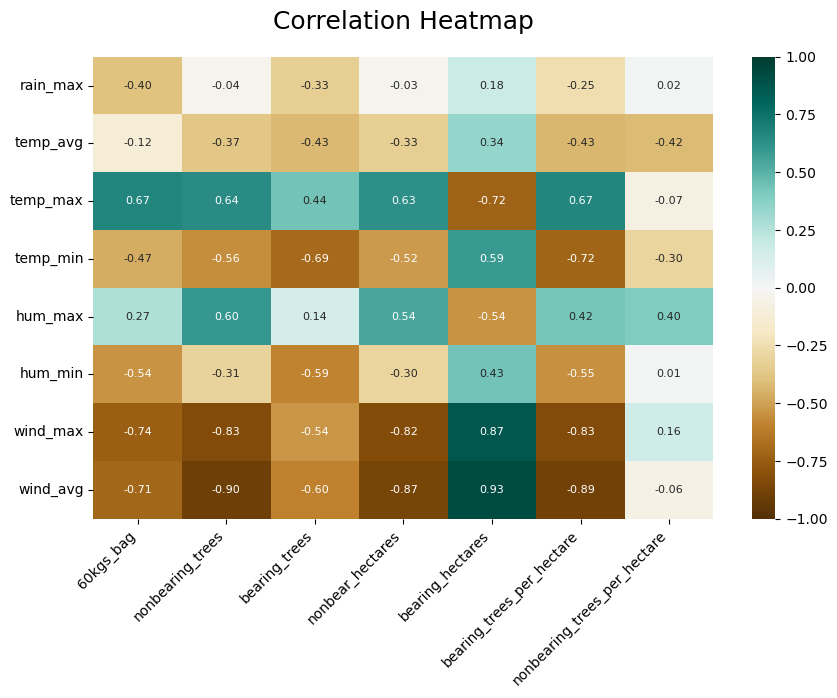

In [593]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    data=weather_vs_coffee_corr,
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='BrBG',
    annot_kws={"size": 8},   
    fmt=".2f"                
)

plt.title('Correlation Heatmap', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)              
plt.show()

We can conclude from the heatmap above:

1. **Strong positive correlations:**
   - **Average wind speed** vs **Hectares of bearing coffee trees**: **+0.93**
   - **Average maximum wind speed** vs **Hectares of bearing coffee trees**: **+0.87**

2. **Strong negative correlation:**
   - **Average maximum wind speed** vs **Hectares of nonbearing coffee trees**: **-0.82**
   - **Average maximum wind speed** vs **Average number of bearing trees per hectare**: **-0.83**
   - **Average maximum wind speed** vs **Amount of nonbearing coffee trees**: **-0.83**
   - **Average wind speed** vs **Hectares of nonbearing coffee trees**: **-0.87**
   - **Average wind speed** vs **Average number of bearing trees per hectare**: **-0.89**
   - **Average wind speed** vs **Amount of nonbearing coffee trees**: **-0.90**

### Bivariate Analysis

I used two subplots to illustrate the relationship between two features:
- **Normalized time series** showing how both features changed over time  
- **Scatter plot with regression line** highlighting their correlation

Below is an implementation of a reusable plotting function to apply this visualization to multiple feature pairs.

In [594]:
def plot_relationship(series_1,
                      series_2,
                      label_1,
                      label_2,
                      title,
                      legend_loc='upper right'):
    """
    Creates two subplots:
      1) Normalized time series of series_1 & series_2
      2) Scatterplot + regression line of series_2 vs. series_1 with Pearson r

    Parameters:
    series_1 (pd.Series): First variable to compare.
    series_2 (pd.Series): Second variable to compare.
    label_1 (str):     Display name for series_1.
    label_2 (str):     Display name for series_2.
    title (str):       Title for the regression subplot.
    legend_loc (str):  Legend location for both subplots.
    """

    # build full year range
    full_years = pd.Series(range(df['year'].min(), df['year'].max() + 1), name='year')
    df_1 = pd.DataFrame({'year': df['year'], 'series_1': series_1, 'series_2': series_2}).set_index('year').reindex(full_years).reset_index()

    # convert year to string to force categorical axis (fix gaps)
    time = df_1['year'].astype(str)
    series_1 = df_1['series_1']
    series_2 = df_1['series_2']

    # normalize both series to [0,1]
    s1n = (series_1 - series_1.min()) / (series_1.max() - series_1.min())
    s2n = (series_2 - series_2.min()) / (series_2.max() - series_2.min())

    # Pearson correlation (skip NaNs)
    r = series_1.corr(series_2)

    # use every second year to reduce tick crowding
    ticks = time[::2]

    # random color for the trendline
    palette = [
        'mediumvioletred', 'darkturquoise', 'deeppink', 'goldenrod', 
        'darkorange', 'crimson', 'limegreen', 'dodgerblue', 
        'orchid', 'slateblue', 'springgreen', 'tomato', 
        'indigo', 'turquoise', 'salmon', 'hotpink', 
        'rebeccapurple', 'cadetblue'
    ]
    c1, c2, c_trend = random.sample(palette, 3)

    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: Time series with categorical x-axis
    ax0.plot(time, s1n, marker='o', linestyle='-', color=c1, label=f'{label_1} (norm)')
    ax0.plot(time, s2n, marker='s', linestyle='--', color=c2, label=f'{label_2} (norm)')
    ax0.set_xticks(ticks)
    ax0.set_xlabel('Year', fontsize=12)
    ax0.set_ylabel('Normalized value', fontsize=12)
    ax0.set_title('Normalized Comparison Over Time', fontsize=14)
    ax0.legend(loc=legend_loc)
    ax0.grid(True, linestyle='--', alpha=0.4)

    # Subplot 2: Regression scatterplot
    sns.regplot(
        x=series_1,
        y=series_2,
        ax=ax1,
        color=c_trend,
        scatter_kws={'s': 50},
        line_kws={'lw': 2},
        label=f'Pearson r = {r:.2f}'
    )
    ax1.set_xlabel(label_1, fontsize=12)
    ax1.set_ylabel(label_2, fontsize=12)
    ax1.set_title(title, fontsize=14)
    ax1.legend(loc=legend_loc)
    ax1.grid(True, linestyle='--', alpha=0.4)

    plt.tight_layout()
    plt.show()

#### 1. Correlation Between Average Temperature and Coffee Harvested

##### 1.1. Correlation Between Average Temperature and Coffee Harvested

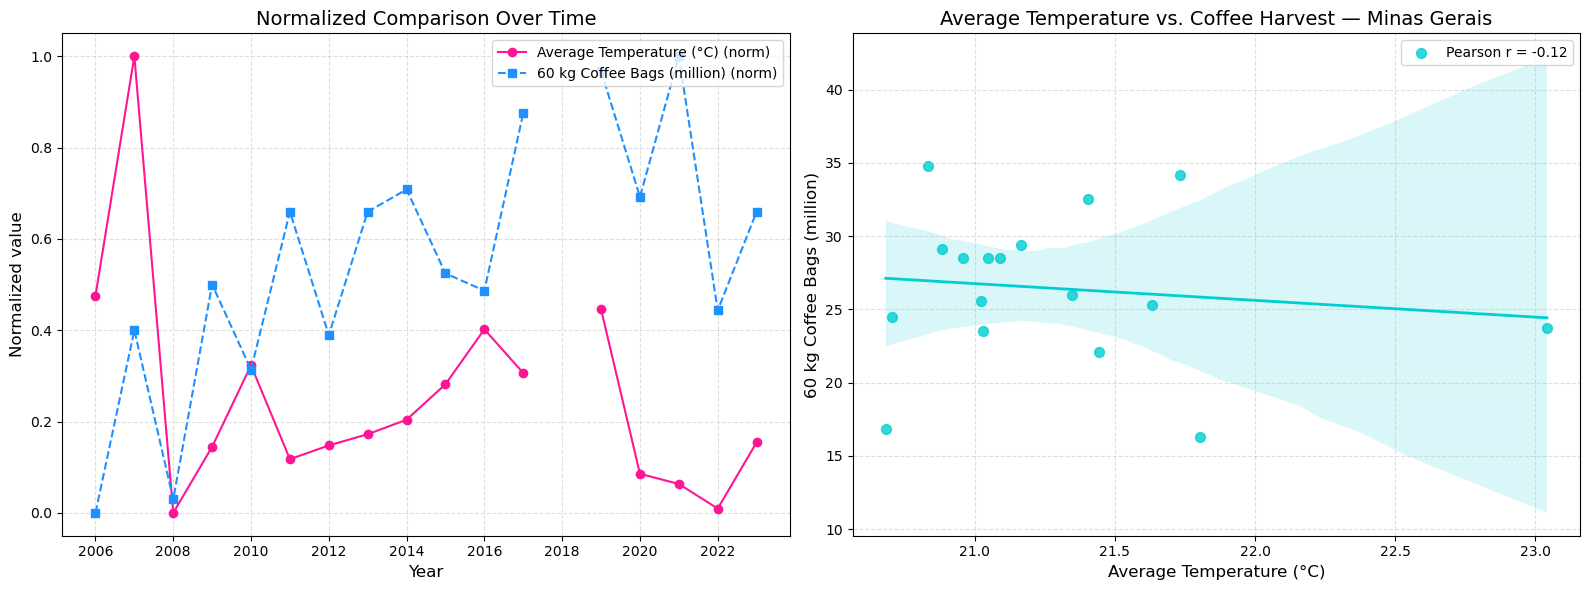

In [595]:
plot_relationship(
    series_1=df['temp_avg'],
    series_2=df['60kgs_bag'],
    label_1='Average Temperature (°C)',
    label_2='60 kg Coffee Bags (million)',
    title='Average Temperature vs. Coffee Harvest — Minas Gerais'
)

There is **no significant correlation** between **Average Temperature** and **Coffee Harvest** in Minas Gerais.

However, given the slight decrease in average temperature over time, it may still contribute to a **negative impact** on coffee yield.

##### 1.2. Correlation Between Minimum Temperature and Coffee Harvested

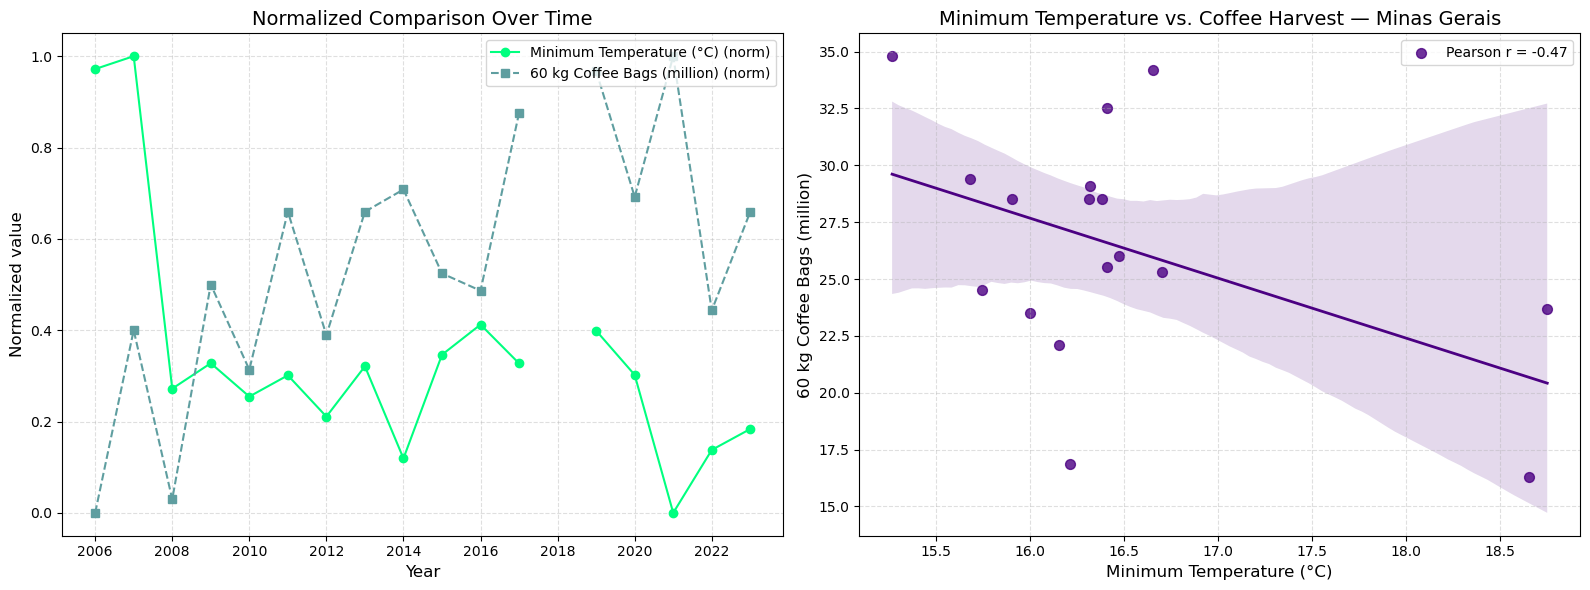

In [596]:
plot_relationship(
    series_1=df['temp_min'],
    series_2=df['60kgs_bag'],
    label_1='Minimum Temperature (°C)',
    label_2='60 kg Coffee Bags (million)',
    title='Minimum Temperature vs. Coffee Harvest — Minas Gerais'
)

**Coffee harvest** is **negatively correlated** with **average minimum temperature.**

While correlation does not imply causation, temperature regimes are known to influence coffee yield, making this relationship meaningful in the agricultural context.

##### 1.3. Correlation Between Minimum Temperature and Coffee Harvested

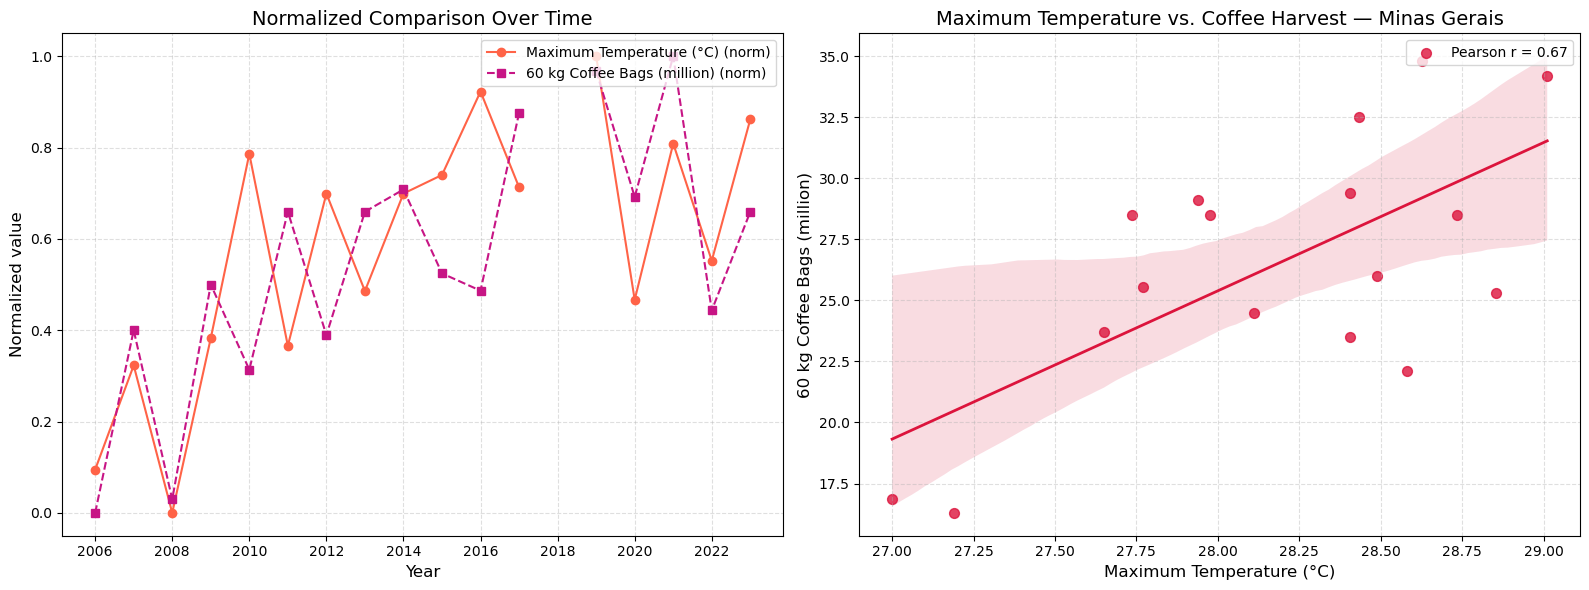

In [597]:
plot_relationship(
    series_1=df['temp_max'],
    series_2=df['60kgs_bag'],
    label_1='Maximum Temperature (°C)',
    label_2='60 kg Coffee Bags (million)',
    title='Maximum Temperature vs. Coffee Harvest — Minas Gerais'
)

**Coffee harvest** is **positively correlated** with **average maximum temperature**.

While correlation does not imply causation, temperature regimes are known to influence coffee yield, making this relationship meaningful in the agricultural context.

#### 2. Correlation Between Humidity and Coffee Harvested

##### 2.1. Correlation Between Minimum Humidity and Coffee Harvested

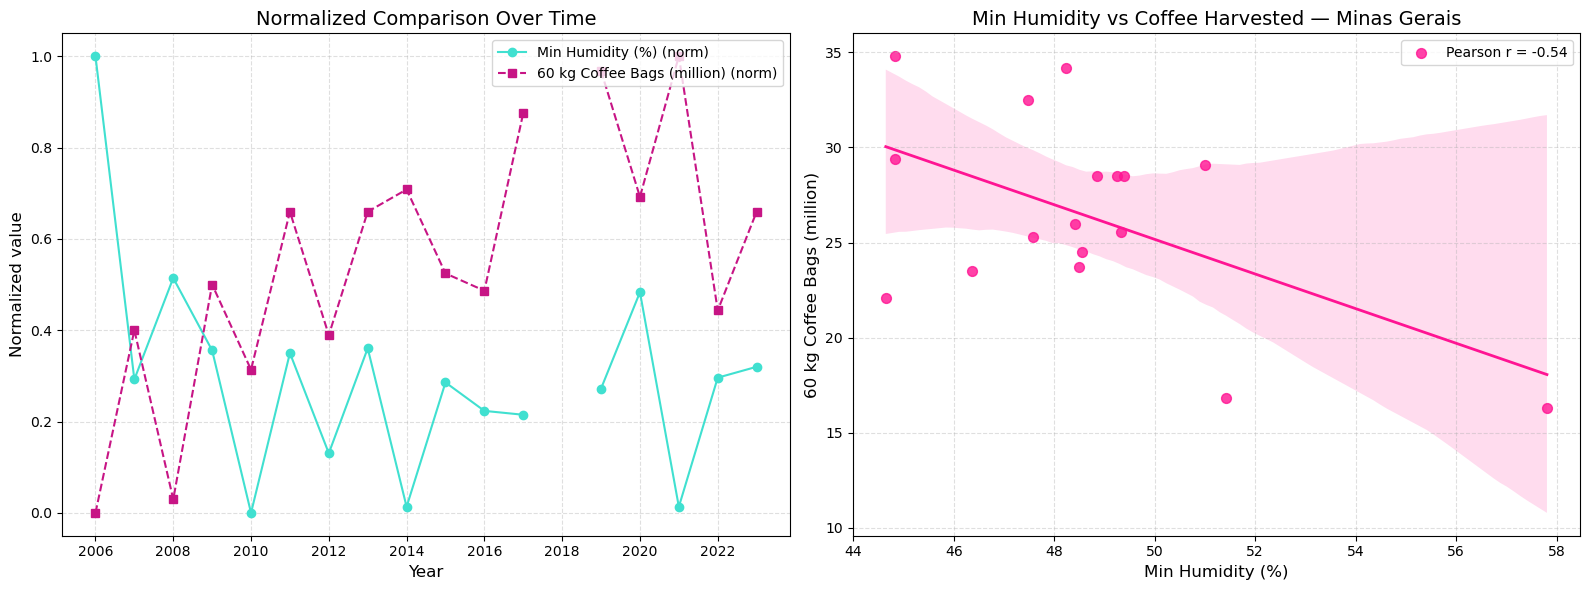

In [613]:
plot_relationship(
    series_1=df['hum_min'],
    series_2=df['60kgs_bag'],
    label_1='Min Humidity (%)',
    label_2='60 kg Coffee Bags (million)',
    title='Min Humidity vs Coffee Harvested — Minas Gerais'
)

**Coffee harvest** is **negatively correlated** with **average minimum humidity**.

While correlation does not imply causation, humidity levels are known to affect coffee yield, making this relationship relevant in the agricultural context.

##### 2.1. Correlation Between Maximum Humidity and Coffee Harvested

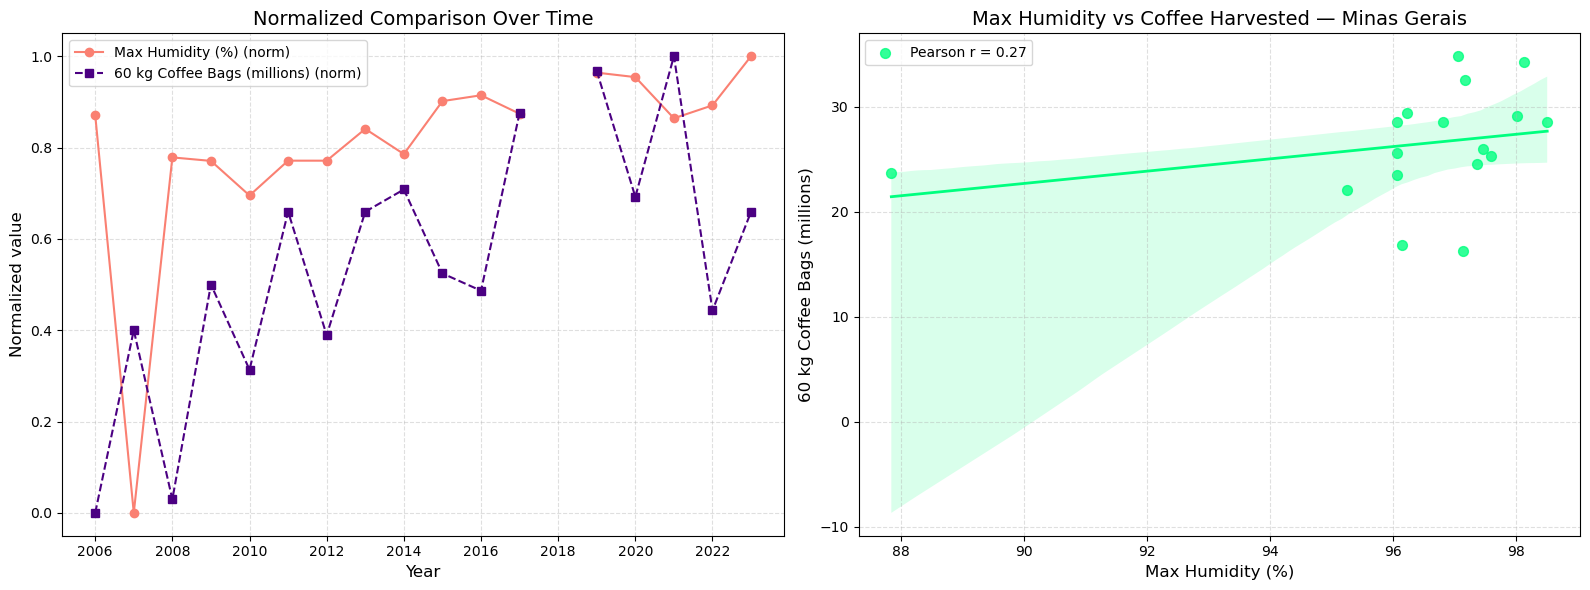

In [599]:
plot_relationship(
    series_1=df['hum_max'],
    series_2=df['60kgs_bag'],
    label_1='Max Humidity (%)',
    label_2='60 kg Coffee Bags (millions)',
    title='Max Humidity vs Coffee Harvested — Minas Gerais',
    legend_loc='upper left'
)

**Coffee harvest** is **positively correlated** with **average maximum humidity**.

While correlation does not imply causation, humidity levels are known to affect coffee yield, making this relationship relevant in the agricultural context.

#### 3. Correlation Between Maximum Rainfall and Coffee Harvested

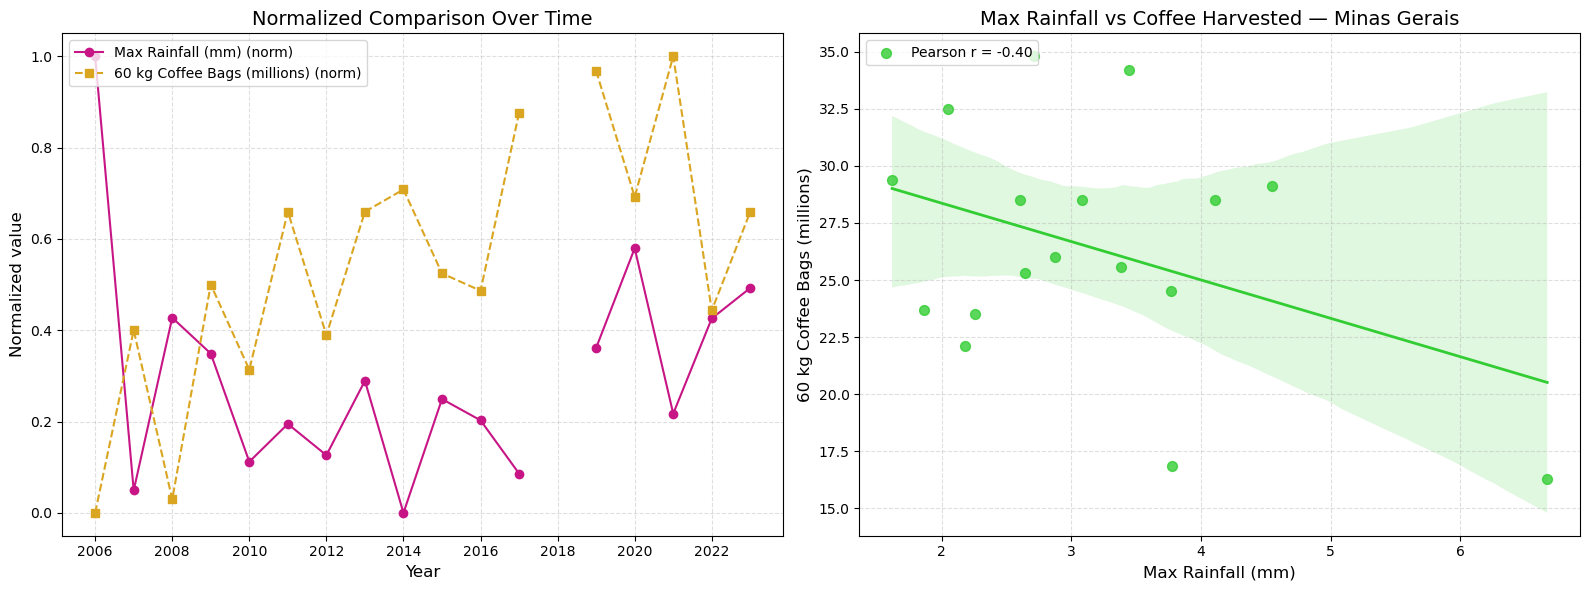

In [600]:
plot_relationship(
    series_1=df['rain_max'],
    series_2=df['60kgs_bag'],
    label_1='Max Rainfall (mm)',
    label_2='60 kg Coffee Bags (millions)',
    title='Max Rainfall vs Coffee Harvested — Minas Gerais',
    legend_loc='upper left'
)

**Coffee harvest** is **negatively correlated** with **average maximum rainfall**.

While correlation does not imply causation, in this case, excessive rainfall can harm coffee yields (by promoting plant diseases and leaching nutrients from the soil).

#### 4. Correlation Between Wind Speed and Coffee Harvested

##### 4.1. Correlation Between Average Wind Speed and Coffee Harvested

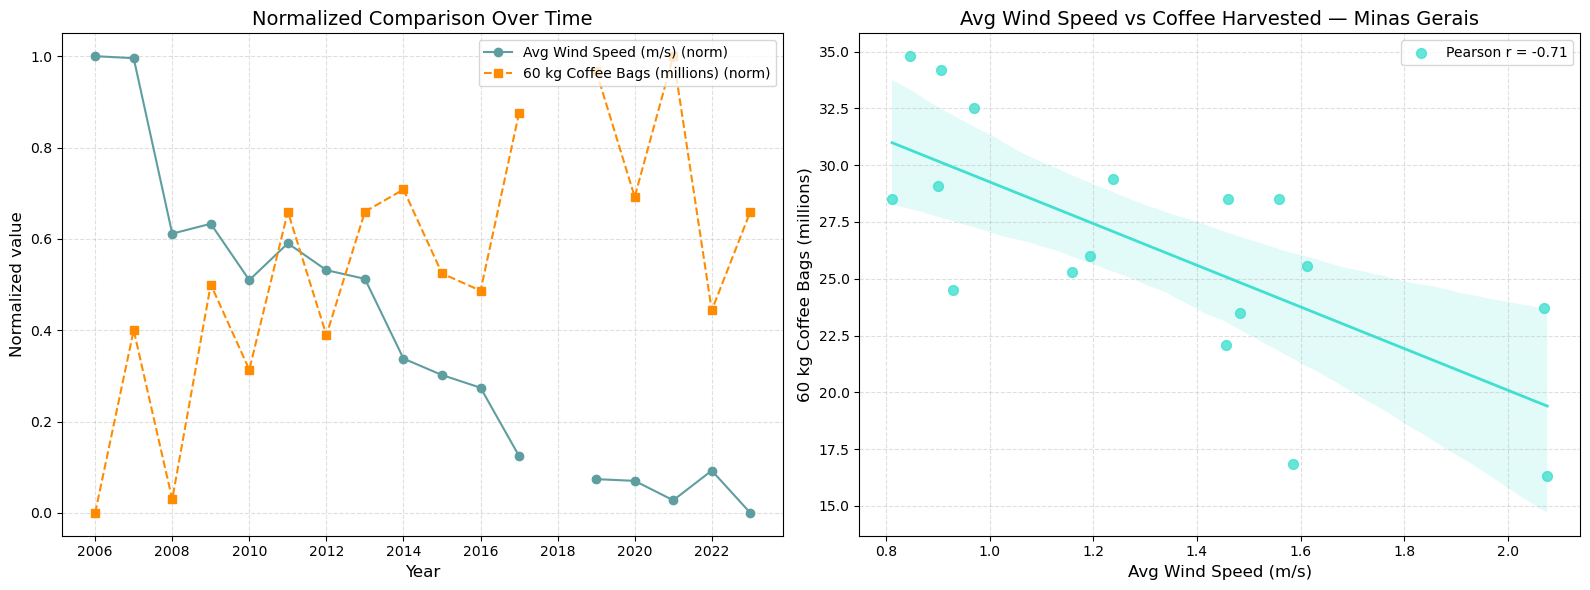

In [601]:
plot_relationship(
    series_1=df['wind_avg'],
    series_2=df['60kgs_bag'],
    label_1='Avg Wind Speed (m/s)',
    label_2='60 kg Coffee Bags (millions)',
    title='Avg Wind Speed vs Coffee Harvested — Minas Gerais',
    legend_loc='upper right'
)

##### 4.2. Correlation Between Maximum Wind Speed and Coffee Harvested

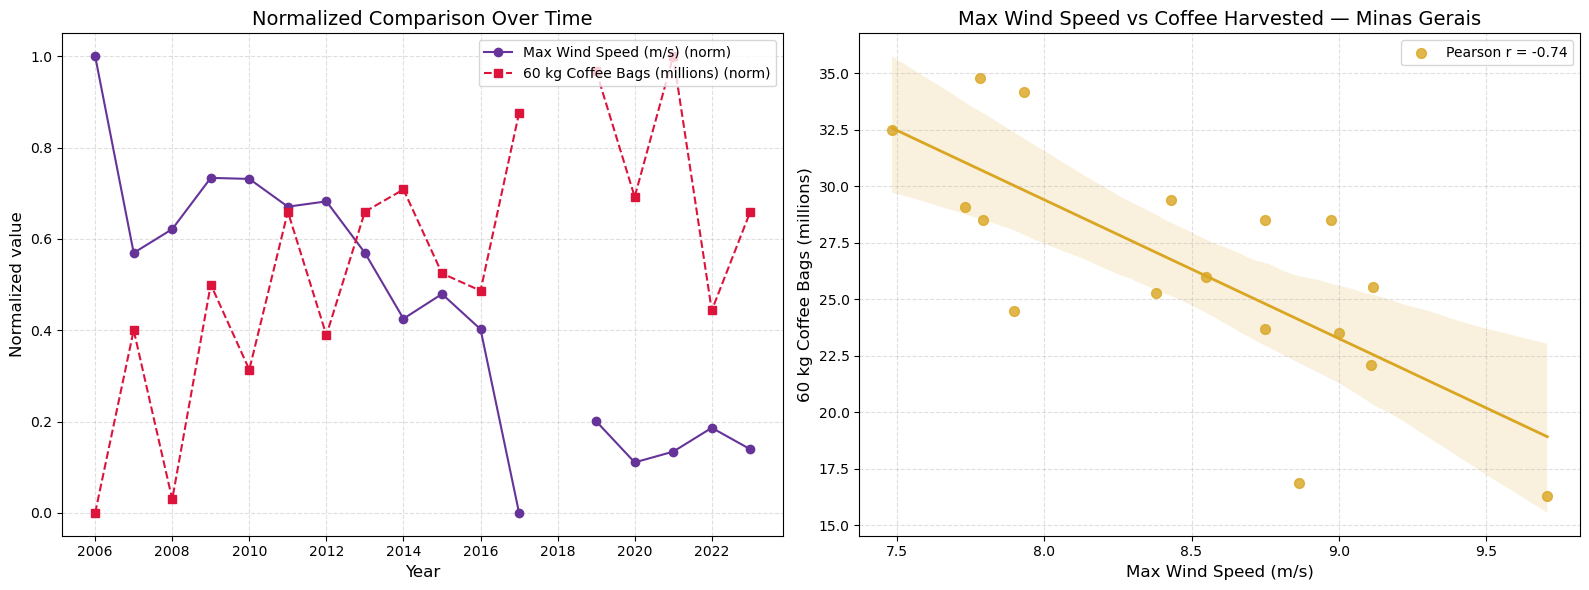

In [602]:
plot_relationship(
    series_1=df['wind_max'],
    series_2=df['60kgs_bag'],
    label_1='Max Wind Speed (m/s)',
    label_2='60 kg Coffee Bags (millions)',
    title='Max Wind Speed vs Coffee Harvested — Minas Gerais',
    legend_loc='upper right'
)

**Coffee harvest** is **negatively correlated** with **average extreme wind speeds (maximum and minimum)**.

This relationship aligns with agronomic expectations, as extreme wind events can lead to physical damage, reduced flowering, and fruit drop, all of which lower coffee yield. 

#### 5. Correlation Between Bearing Coffee Trees and Weather Features

To better understand production dynamics, I conducted a **bivariate analysis** between **bearing coffee trees** and **weather features**, given that the number of bearing trees directly influences coffee yield.

I created a dictionary `bearing_trees_correlation` to store the correlation values between **bearing coffee trees** and **weather features**. This will later be used to display a **sorted textual summary** of these correlations for easier interpretation.

In [603]:
bearing_trees_correlation = {}

##### 5.1. Correlation Between Bearing Coffee Trees and Temperature

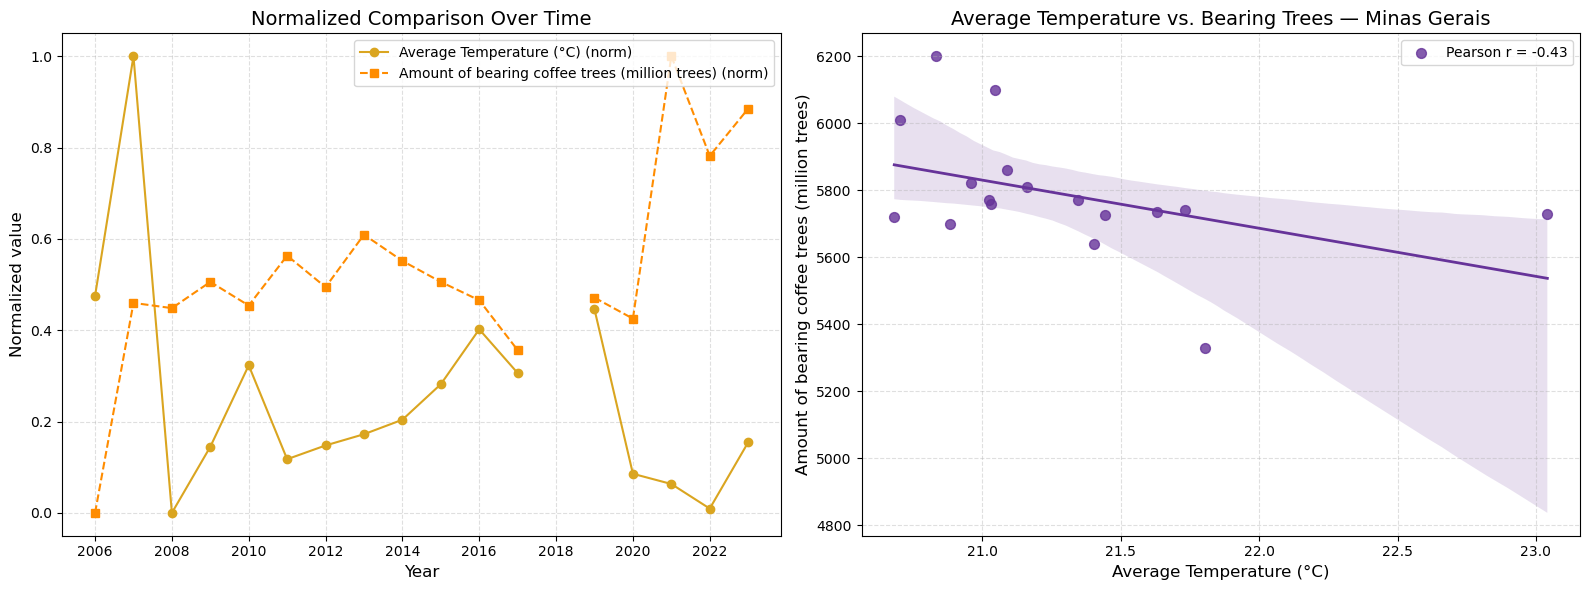

In [604]:
plot_relationship(
    series_1=df['temp_avg'],
    series_2=df['bearing_trees'],
    label_1='Average Temperature (°C)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Average Temperature vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Average Temperature vs. Bearing Trees'] = df['bearing_trees'].corr(df['temp_avg'], method='pearson')

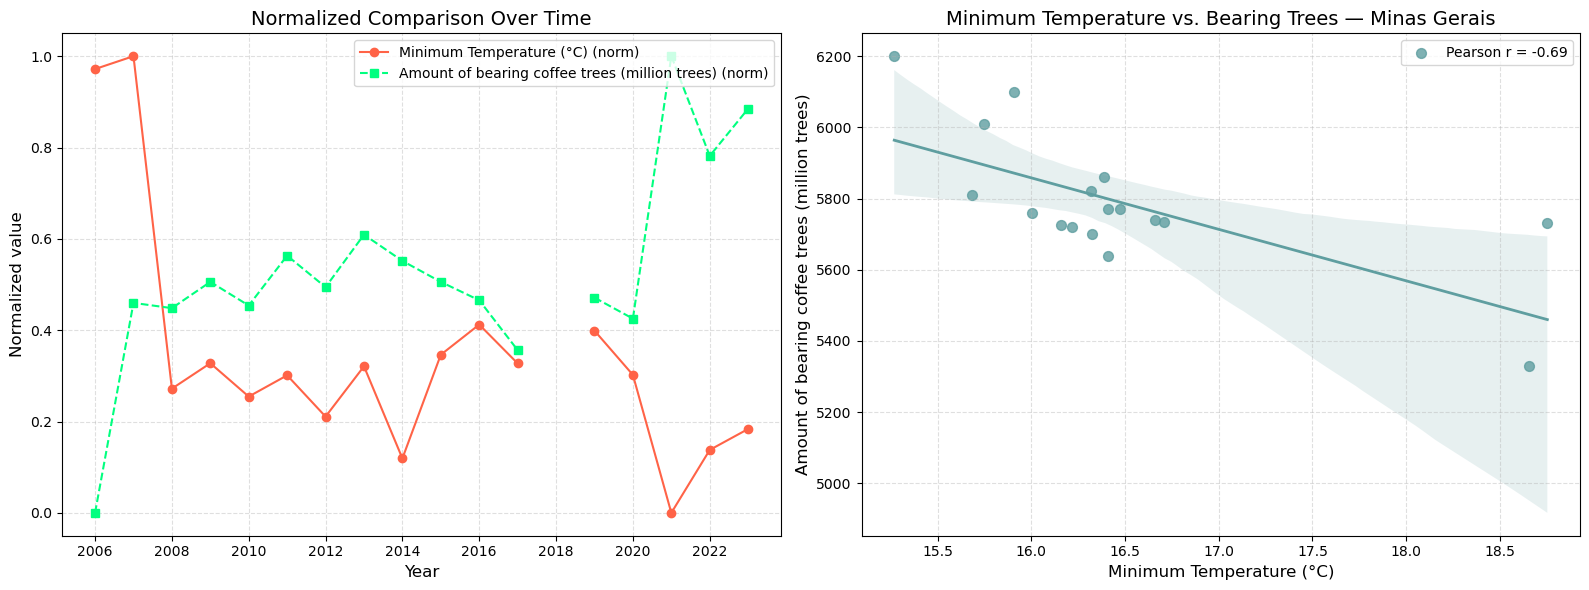

In [605]:
plot_relationship(
    series_1=df['temp_min'],
    series_2=df['bearing_trees'],
    label_1='Minimum Temperature (°C)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Minimum Temperature vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Minimum Temperature vs. Bearing Trees'] = df['bearing_trees'].corr(df['temp_min'], method='pearson')

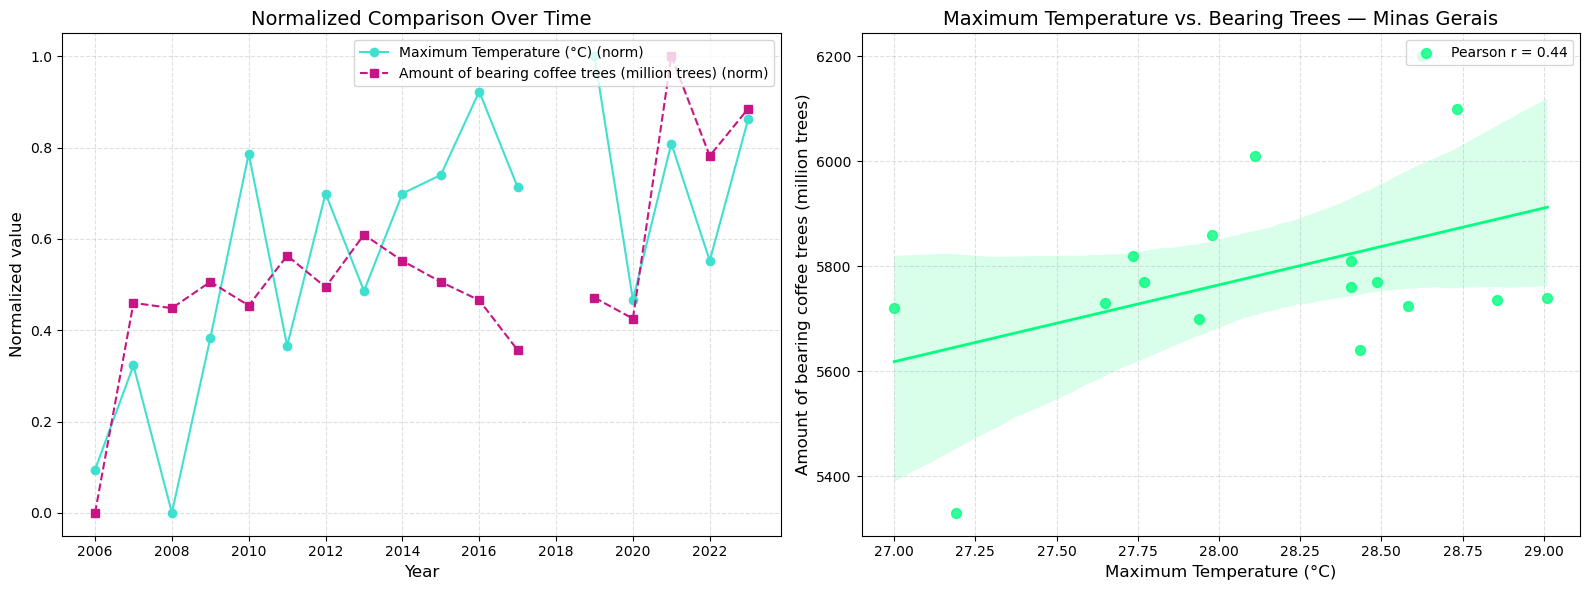

In [606]:
plot_relationship(
    series_1=df['temp_max'],
    series_2=df['bearing_trees'],
    label_1='Maximum Temperature (°C)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Maximum Temperature vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Maximum Temperature vs. Bearing Trees'] = df['bearing_trees'].corr(df['temp_max'], method='pearson')

As observed previously with the **60 kg bags of coffee harvested**, **temperature regimes** also play a key role in the **number of bearing coffee trees**, with **low temperatures negatively impacting** tree development and yield potential.

##### 5.2. Correlation Between Bearing Coffee Trees and Humidity

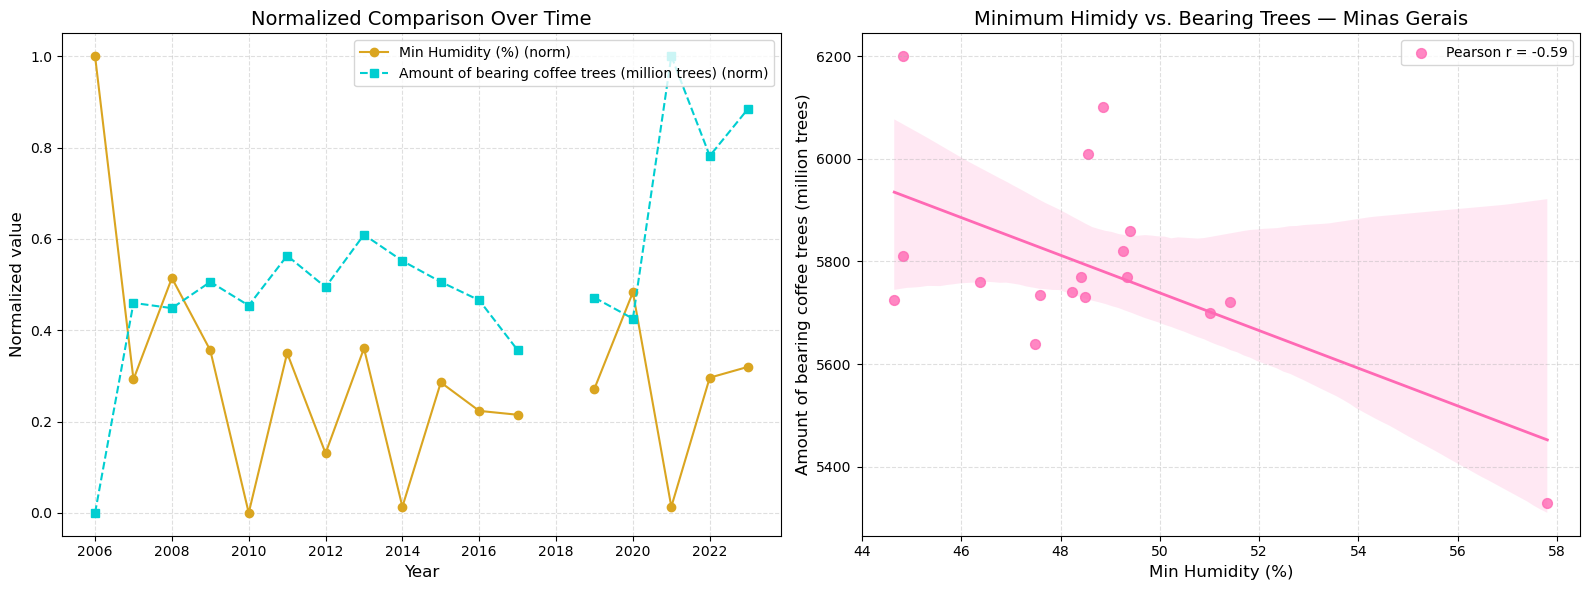

In [607]:
plot_relationship(
    series_1=df['hum_min'],
    series_2=df['bearing_trees'],
    label_1='Min Humidity (%)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Minimum Himidy vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Minimum Himidy vs. Bearing Trees'] = df['bearing_trees'].corr(df['hum_min'], method='pearson')

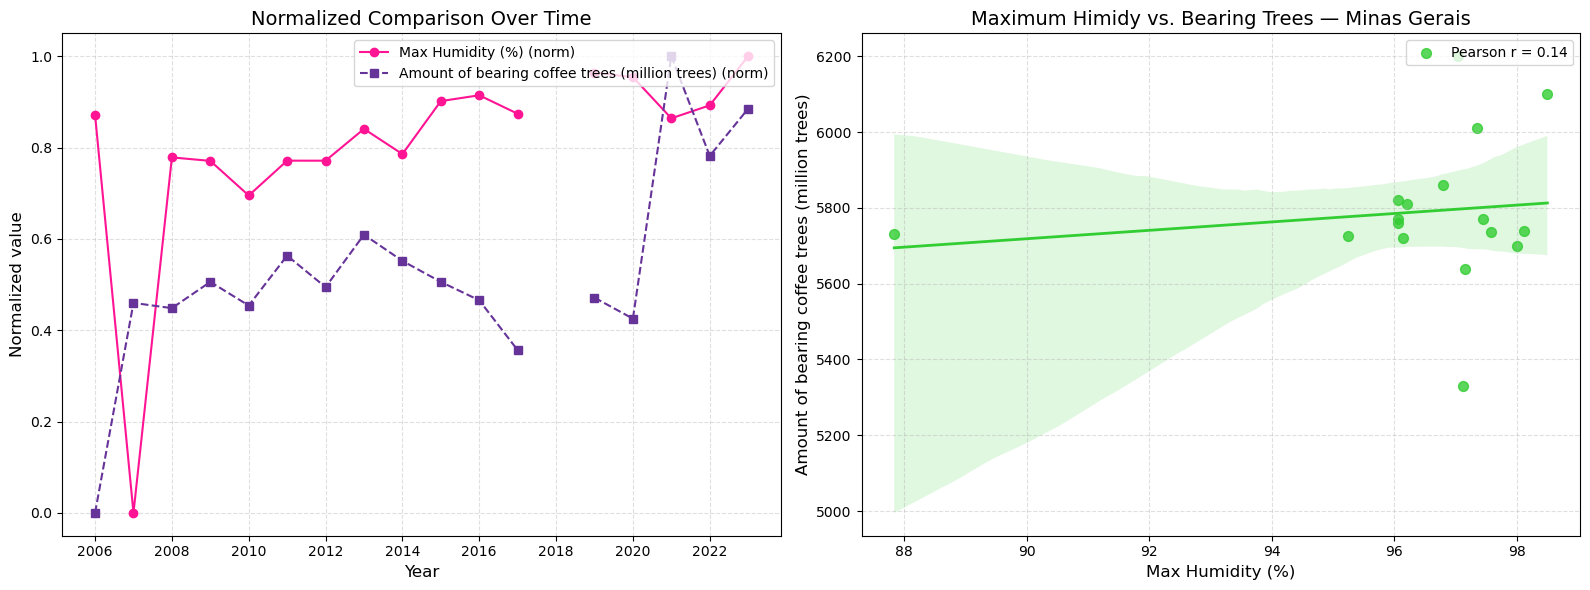

In [608]:
plot_relationship(
    series_1=df['hum_max'],
    series_2=df['bearing_trees'],
    label_1='Max Humidity (%)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Maximum Himidy vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Maximum Himidy vs. Bearing Trees'] = df['bearing_trees'].corr(df['hum_max'], method='pearson')

The **amount of bearing coffee trees** shows a **strong correlation with humidity levels**. **Low humidity** negatively impacts both the **number of bearing trees** and overall **coffee yield**, affecting plant health and fruit development.

##### 5.3. Correlation Between Bearing Coffee Trees and Maximum Rainfall

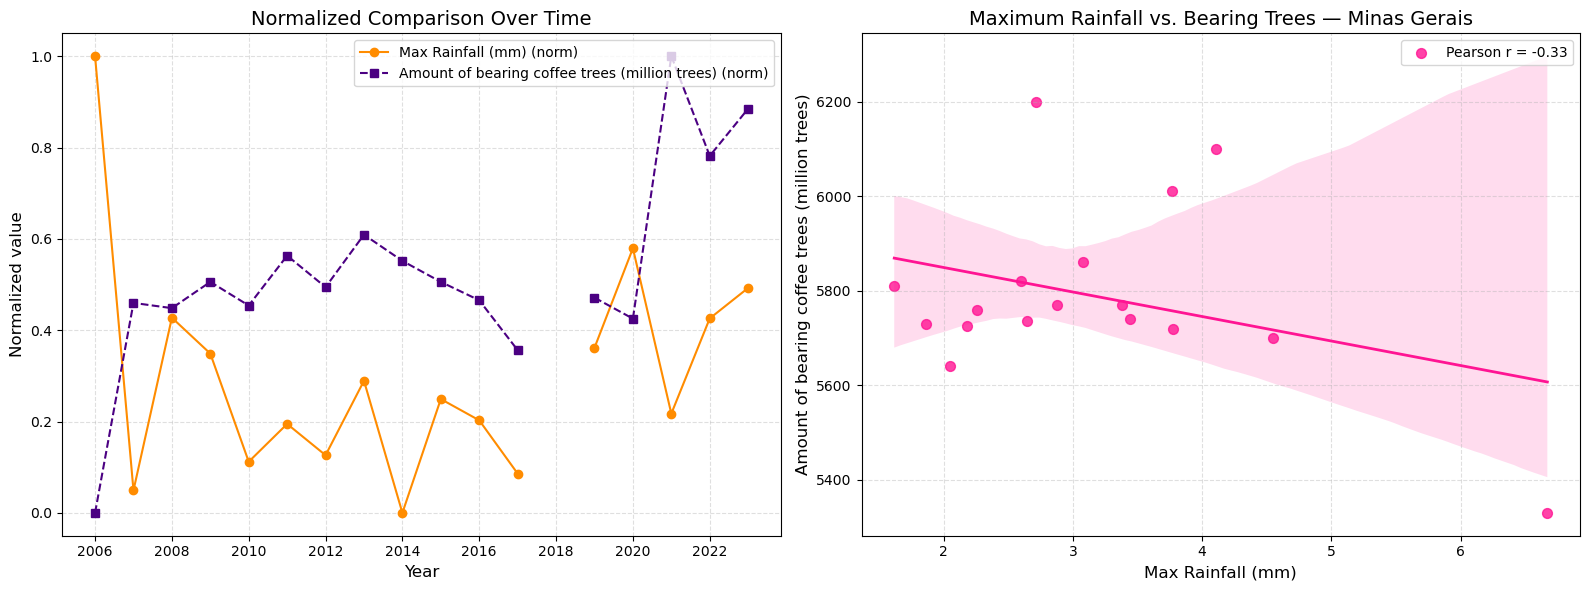

In [609]:
plot_relationship(
    series_1=df['rain_max'],
    series_2=df['bearing_trees'],
    label_1='Max Rainfall (mm)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Maximum Rainfall vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Maximum Rainfall vs. Bearing Trees'] = df['bearing_trees'].corr(df['rain_max'], method='pearson')

As expected, **maximum rainfall** is **negatively correlated** with the **amount of bearing coffee trees**, contributing to reduced **coffee yields** by stressing plants and promoting unfavorable growing conditions.

##### 5.4. Correlation Between Bearing Coffee Trees and Average Wind Speed 

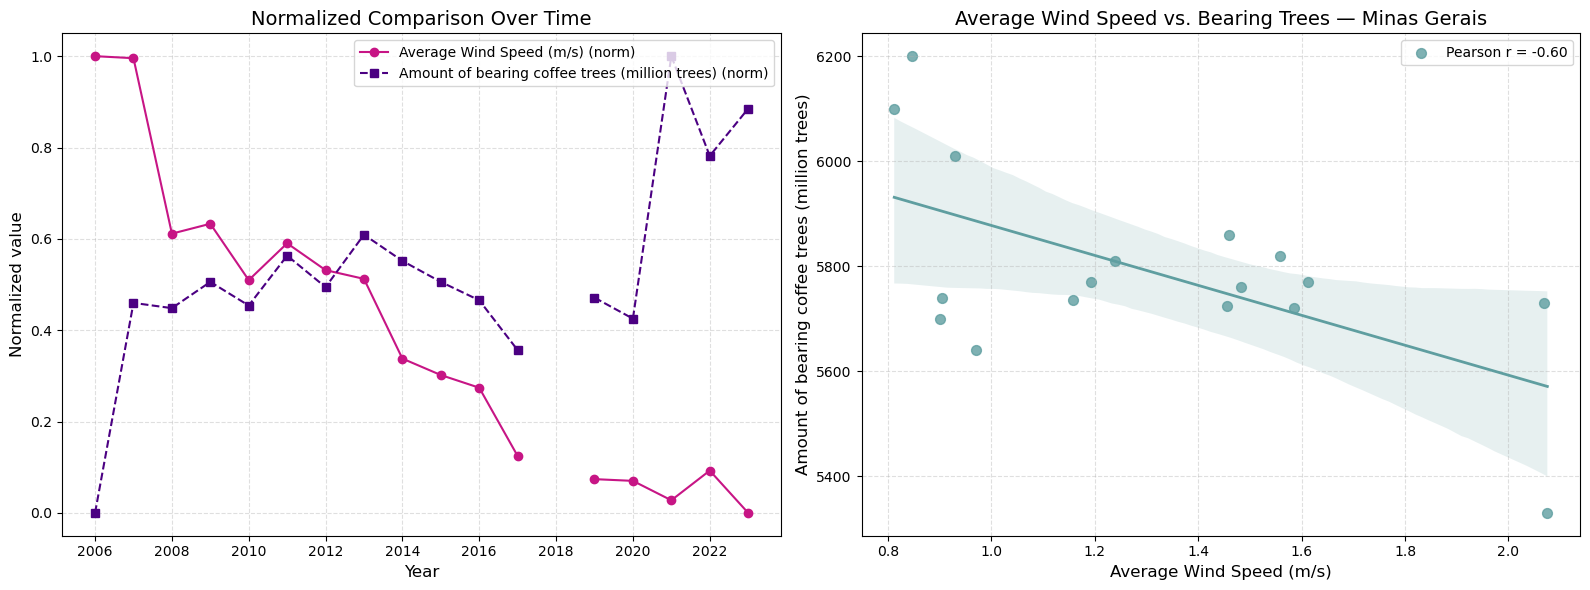

In [610]:
plot_relationship(
    series_1=df['wind_avg'],
    series_2=df['bearing_trees'],
    label_1='Average Wind Speed (m/s)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Average Wind Speed vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Average Wind Speed vs. Bearing Trees'] = df['bearing_trees'].corr(df['wind_avg'], method='pearson')

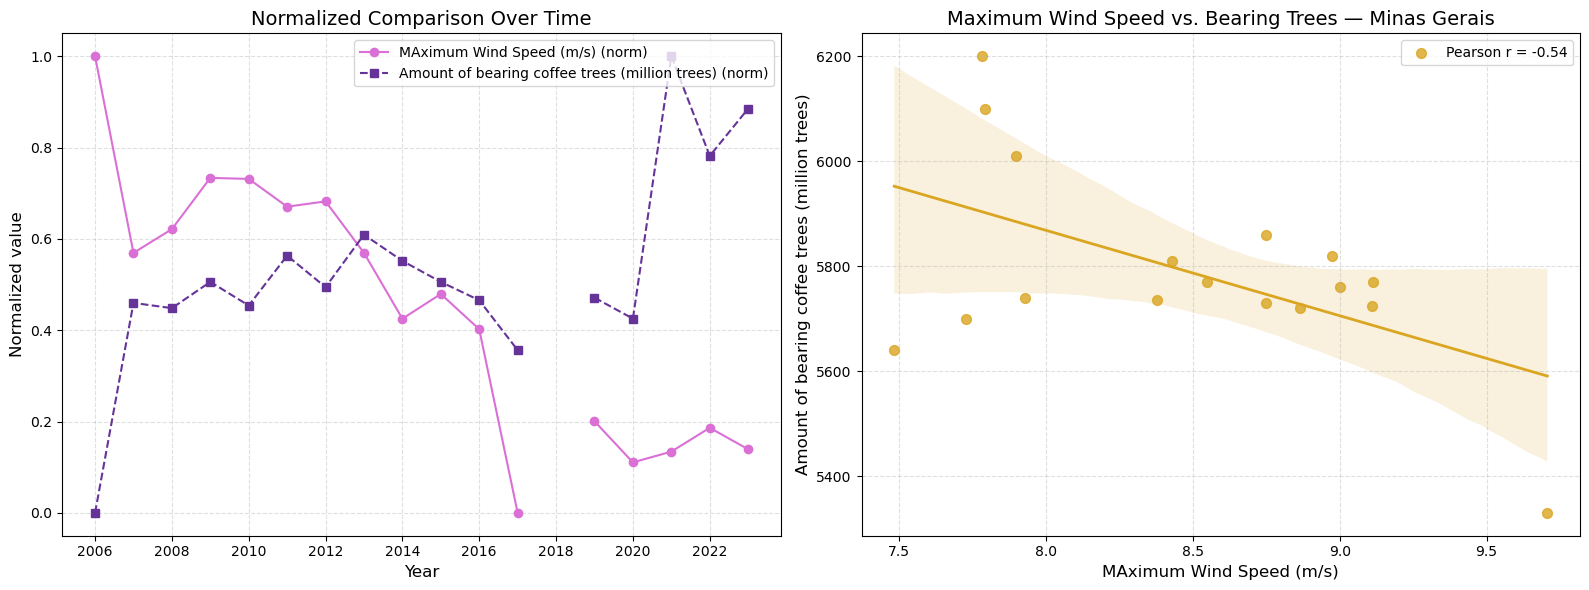

In [ ]:
plot_relationship(
    series_1=df['wind_max'],
    series_2=df['bearing_trees'],
    label_1='Maximum Wind Speed (m/s)',
    label_2='Amount of bearing coffee trees (million trees)',
    title='Maximum Wind Speed vs. Bearing Trees — Minas Gerais'
)
bearing_trees_correlation['Maximum Wind Speed vs. Bearing Trees'] = df['bearing_trees'].corr(df['wind_max'], method='pearson')

**Extreme wind values** (both **maximum** and **minimum**) show a **negative correlation** with the **amount of bearing coffee trees**, ultimately reducing **coffee production**.

#### 5.5 Sorted Correlations with Bearing Trees

This code sorts the Pearson correlation coefficients between bearing trees and various weather features in ascending order and prints each feature alongside its correlation value.

In [612]:
sorted_bearing_trees_correlation = {k: v for k, v in sorted(bearing_trees_correlation.items(), key=lambda item: item[1])}
for i in sorted_bearing_trees_correlation:
    print(f'{i}: {bearing_trees_correlation[i]:.2f}')

Minimum Temperature vs. Bearing Trees: -0.69
Average Wind Speed vs. Bearing Trees: -0.60
Minimum Himidy vs. Bearing Trees: -0.59
Maximum Wind Speed vs. Bearing Trees: -0.54
Average Temperature vs. Bearing Trees: -0.43
Maximum Rainfall vs. Bearing Trees: -0.33
Maximum Himidy vs. Bearing Trees: 0.14
Maximum Temperature vs. Bearing Trees: 0.44


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof! Look back to W6D3 for more context.

What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use Pearson's correlation coefficient.

> There is a **weak negative correlation** between the average temperature and the amount of coffee harvested in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **-0.12**, and is clearly reflected in the **regression line** on the scatterplot.

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

> There is a **moderate negative correlation** between the minimum humidity and the amount of coffee harvested in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **-0.54**, and is clearly reflected in the **regression line** on the scatterplot.

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

> There is a **moderate negative correlation** between the maximum rainfall and the amount of coffee harvested in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **-0.40**, and is clearly reflected in the **regression line** on the scatterplot.

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

> There is a **moderate negative correlation** between the average wind speed and the amount of coffee harvested in Minas Gerais.  
> This is supported by a Pearson correlation coefficient of **-0.71**, and is clearly reflected in the **regression line** on the scatterplot.

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

> **Bivariate Relationships with Bearing Trees**  
> - **Average Temperature** (`temp_avg`): r = –0.43 — negative, **moderate negative** (–0.60 < r ≤ –0.30)  
> - **Minimum Humidity** (`hum_min`): r = –0.59 — negative, **moderate negative** (–0.60 < r ≤ –0.30)  
> - **Maximum Rainfall** (`rain_max`): r = –0.33 — negative, **moderate negative** (–0.60 < r ≤ –0.30)  
> - **Average Wind Speed** (`wind_avg`): r = –0.60 — negative, **strong negative** (–0.80 < r ≤ –0.60)  

> All four weather features show a **negative** relationship with bearing trees.  
> **Average wind speed** has the **strongest negative** correlation (r = –0.60), followed by **minimum humidity** (r = –0.59).  
> **Average temperature** and **maximum rainfall** both exhibit **moderate negative** correlations (r = –0.43 and –0.33, respectively).

## Which weather factor seems to influence coffee production the most?

> There are two key production metrics:  
> - **60 kg bags harvested** (`60kgs_bag`)  
> - **Number of bearing trees** (`bearing_trees`)

> ### Strongest influences

> - **60 kg bags harvested** (`60kgs_bag`):  
>   - **Positive:** maximum temperature (`temp_max`)  
>   - **Negative:** average wind speed (`wind_avg`)

> - **Number of bearing trees** (`bearing_trees`):  
>   - **Negative:** minimum temperature (`temp_min`)

> ### Interpretation
> - **Wind:** Years with higher average wind speed are associated with fewer bearing trees, making wind the most influential factor for tree count.  
> - **Temperature:** Harvest volume increases with higher maximum temperature, suggesting temperature is the key driver for yield.

> **Note:** A strong correlation indicates a statistical relationship, **not** causation—further agronomic or experimental evidence is needed to establish causality.  

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

> I’d begin with:
> - **High-resolution weather**: daily/hourly temp, rain, humidity, sun and extremes (frost, heatwaves, drought)  
> - **Soil health**: moisture, pH, nutrient levels  
> - **Farm practices**: irrigation schedules, fertilizer/pesticide use, shade management  

> Next, I’d add:
> - **Yield & quality**: kg or bags per hectare, cupping scores, defect counts  
> - **Economic & logistics**: input costs, farm-gate prices, exchange rates, transport times/losses  

> Finally, I’d focus on the metrics with the strongest impact on coffee production and design analyses to move from correlation toward causality.  

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

> If I were advising coffee farmers, I’d emphasize:
> 
> - **Temperature:** A warmer regime boosts yield—our data show a strong positive link (r ≈ +0.67) between average temperature and 60 kg bags harvested.  
> - **Humidity:** Keep minimum humidity high—drops in humidity correlate negatively with tree productivity (r ≈ –0.54).  
> - **Wind:** High wind speeds hurt both tree health and yield (strong negative correlation, r ≈ –0.95), so use windbreaks or shelter belts for protection.  

## Appendix
### Pearson Correlation Coefficient

The Pearson correlation coefficient (**r**) measures the strength and direction of the linear relationship between two variables.

| Correlation (r) Range       | Interpretation                                                                  |
|----------------------------|----------------------------------------------------------------------------------|
| **r = +1**                 | The dependent variable *y* is perfectly positively correlated with *x*           |
| **+0.80 < r < +1.00**      | Strong positive correlation                                                      |
| **+0.30 < r ≤ +0.60**      | Moderate positive correlation                                                    |
| **+0.00 < r ≤ +0.30**      | Weak positive correlation                                                        |
| **r = 0**                  | No linear correlation between *x* and *y*                                        |
| **–0.30 < r < 0.00**       | Weak negative correlation                                                        |
| **–0.60 < r ≤ –0.30**      | Moderate negative correlation                                                    |
| **–1.00 < r ≤ –0.80**      | Strong negative correlation                                                      |
| **r = –1**                 | The dependent variable *y* is perfectly negatively correlated with *x*           |

**Source:** Profillidis et al. (2019)